RAJ RAUNAK KUMAR 20HCS4148

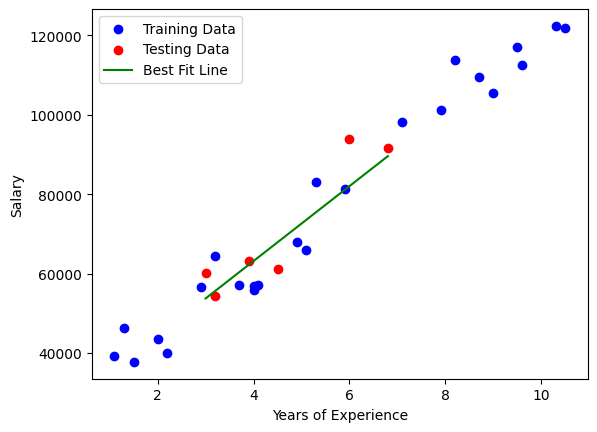

Mean Squared Error (MSE) on Testing Data: 39326046.03956001
R-squared (R2) on Testing Data: 0.8433355166157537


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset ko CSV file se load karna
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')  # CSV se data read karna

# Data ko training aur testing sets mein divide karna
train_data = data.sample(frac=0.8, random_state=42)  # 80% data training set ke liye
test_data = data.drop(train_data.index)  # Baaki 20% data testing set ke liye

# Training aur testing sets ke features aur target variable ko extract karna
X_train = train_data['YearsExperience'].values.reshape(-1, 1)  # Training set ka feature
y_train = train_data['Salary'].values  # Training set ka target variable

X_test = test_data['YearsExperience'].values.reshape(-1, 1)  # Testing set ka feature
y_test = test_data['Salary'].values  # Testing set ka target variable

# Linear regression ko custom function ke zariye implement karna
def linear_regression_ols(X, y):
    # Intercept ke liye column of ones add karna
    X = np.c_[np.ones(X.shape[0]), X]  # Ones ka column add karna

    # Ordinary Least Squares (OLS) ka formula istemal karke coefficients nikalna
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # OLS formula se coefficients nikalna

    return beta  # Coefficients ko wapas bhejna

# Custom function ka istemal karke model ko fit karna
beta = linear_regression_ols(X_train, y_train)  # Model ko fit karna using OLS

# Testing set par prediction karna
y_pred = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], beta)  # Predictions generate karna using best fit line

# Mean Squared Error (MSE) aur R2 ko calculate karna
mse = np.mean((y_test - y_pred) ** 2)  # Mean Squared Error ko calculate karna
ss_res = np.sum((y_test - y_pred) ** 2)  # Residual sum of squares
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)  # R-squared value calculate karna

# Training aur testing data ke sath scatter plot banana aur best fit line draw karna
plt.scatter(X_train, y_train, color='blue', label='Training Data')  # Training data ko scatter plot mein show karna
plt.scatter(X_test, y_test, color='red', label='Testing Data')  # Testing data ko scatter plot mein show karna
plt.plot(X_test, y_pred, color='green', label='Best Fit Line')  # Best fit line ko plot karna
plt.xlabel('Years of Experience')  # X-axis ka label
plt.ylabel('Salary')  # Y-axis ka label
plt.legend()  # Legend ko show karna
plt.show()  # Plot ko display karna

print(f'Mean Squared Error (MSE) on Testing Data: {mse}')  # MSE ko display karna
print(f'R-squared (R2) on Testing Data: {r2}')  # R2 value ko display karna
